<a href="https://colab.research.google.com/github/chariot77/Big-Sales-Prediction/blob/main/Big_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading dataset and inspecting data

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Big%20Sales%20Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [5]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDG47,12.8,Low Fat,0.069606,Starchy Foods,261.9252,OUT035,2004,Small,Tier 2,Supermarket Type1,4984.178800
14200,FDG47,12.8,Low Fat,0.070013,Starchy Foods,262.8252,OUT017,2007,Medium,Tier 2,Supermarket Type1,2885.577200
14201,FDG47,12.8,Low Fat,0.069561,Starchy Foods,263.0252,OUT013,1987,High,Tier 3,Supermarket Type1,2885.577200
14202,FDG47,NaN,Low Fat,0.069282,Starchy Foods,263.5252,OUT027,1985,Medium,Tier 3,Supermarket Type3,3803.676434
14203,FDG47,12.8,Low Fat,0.069727,Starchy Foods,263.6252,OUT049,1999,Medium,Tier 1,Supermarket Type1,3644.354765


In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [8]:
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,False,False,False,False,False,False,False,False,False,False,False,False
14200,False,False,False,False,False,False,False,False,False,False,False,False
14201,False,False,False,False,False,False,False,False,False,False,False,False
14202,False,True,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales
False            False        False             False            False      False     False              False                      False        False                 False        False                11815
                 True         False             False            False      False     False              False                      False        False                 False        False                 2389
Name: count, dtype: int64

In [10]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,False,False,False,False,False,False,False,False,False,False,False,False
14200,False,False,False,False,False,False,False,False,False,False,False,False
14201,False,False,False,False,False,False,False,False,False,False,False,False
14202,False,True,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales
False            False        False             False            False      False     False              False                      False        False                 False        False                11815
                 True         False             False            False      False     False              False                      False        False                 False        False                 2389
Name: count, dtype: int64

In [12]:
df.isna().head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
maxmrp = df['Item_MRP'].idxmax()
maxmrp

2770

In [14]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'), inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [16]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.065953,141.004977,1997.830681,2185.836320
std,4.251186,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,922.135101
50%,12.800000,0.054021,142.247000,1999.000000,1768.287680
75%,16.000000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


Counting total values of different categories

In [17]:
df['Item_Identifier'].value_counts()

,count
Item_Identifier,
FDT36,10
FDG09,10
FDZ56,10
FDT19,10
FDD56,10
...,...
NCW54,7
FDS22,7
FDM50,7


In [18]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,8485
Regular,4824
LF,522
reg,195
low fat,178


In [19]:
df.replace({ 'Item_Fat_Content' : {'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,9185
Regular,5019


In [20]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,2013
Snack Foods,1989
Household,1548
Frozen Foods,1426
Dairy,1136
Baking Goods,1086
Canned,1084
Health and Hygiene,858
Meat,736


In [21]:
df.replace({'Item_Type' :{'Fruits and Vegetables' : 'Food',
                          'Snack Foods' : 'Food',
                          'Household' : 'Things',
                          'Frozen Foods' : 'Food',
                          'Dairy' : 'Food',
                          'Baking Goods' : 'Food',
                          'Canned' : 'Food',
                          'Health and Hygiene' : 'Things',
                          'Meat' : 'Food',
                          'Soft Drinks' : 'Food',
                          'Breads' : 'Food',
                          'Hard Drinks' : 'Food',
                          'Others' : 'Others',
                          'Starchy Foods' : 'Food',
                          'Breakfast' : 'Food',
                          'Seafood' : 'Food',
                          }}, inplace=True)

In [22]:
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,1559
OUT013,1553
OUT049,1550
OUT046,1550
OUT035,1550
OUT045,1548
OUT018,1546
OUT017,1543
OUT010,925


In [23]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,7122
Small,5529
High,1553


In [24]:
df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,5583
Tier 2,4641
Tier 1,3980


In [25]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,9294
Grocery Store,1805
Supermarket Type3,1559
Supermarket Type2,1546


In [26]:
df.shape

(14204, 12)

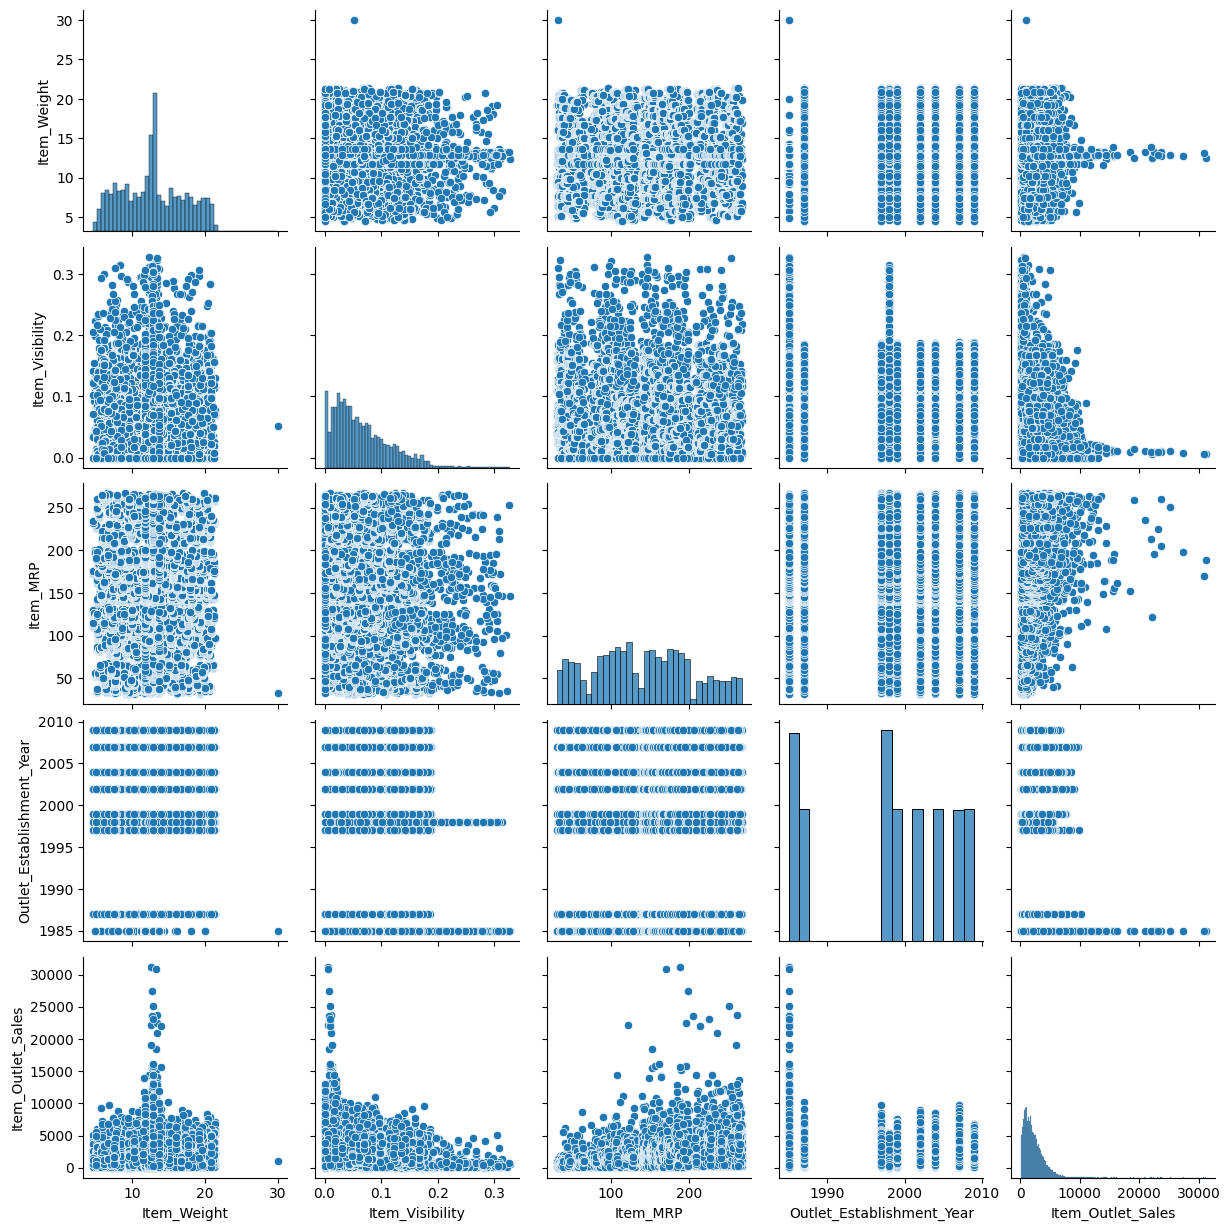

In [27]:
sns.pairplot(df)

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

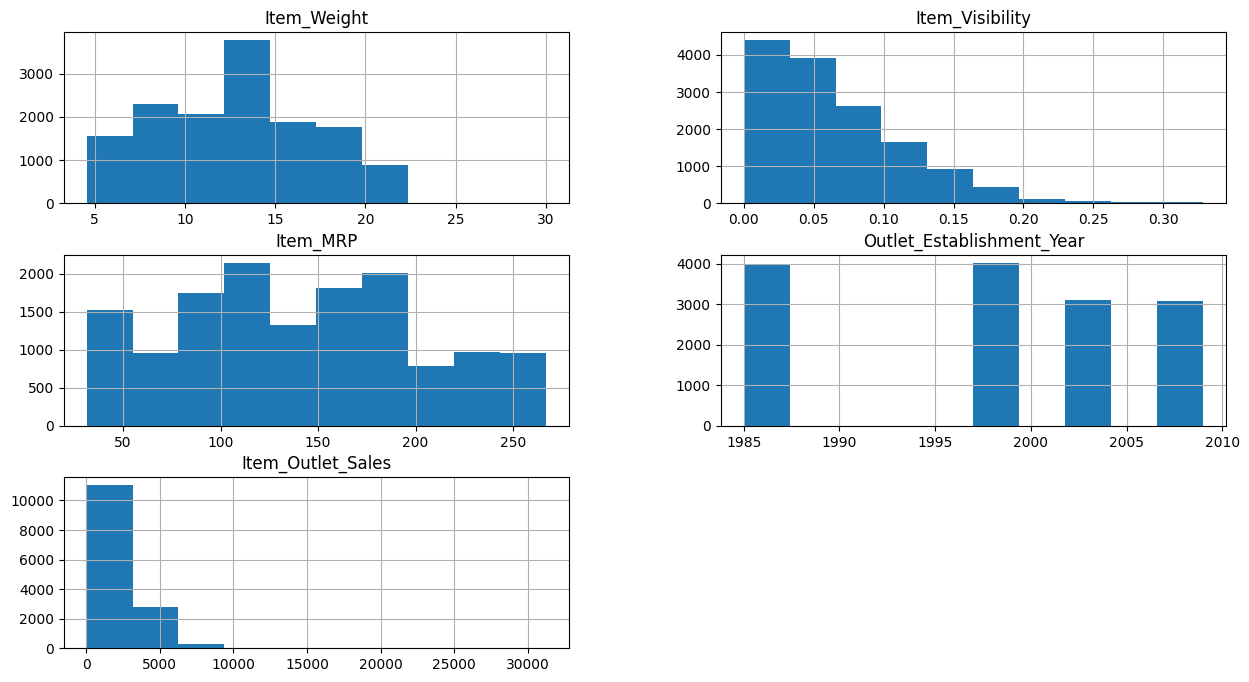

In [28]:
df.hist(figsize=(15,8))

In [29]:
correlation_original = df[['Item_Weight' , 'Item_Visibility' , 'Item_MRP' , 'Item_Outlet_Sales']].corr()
correlation_original

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014176,0.034502,0.160823
Item_Visibility,-0.014176,1.000000,-0.006351,-0.158813
Item_MRP,0.034502,-0.006351,1.000000,0.532261
Item_Outlet_Sales,0.160823,-0.158813,0.532261,1.000000


<Axes: >

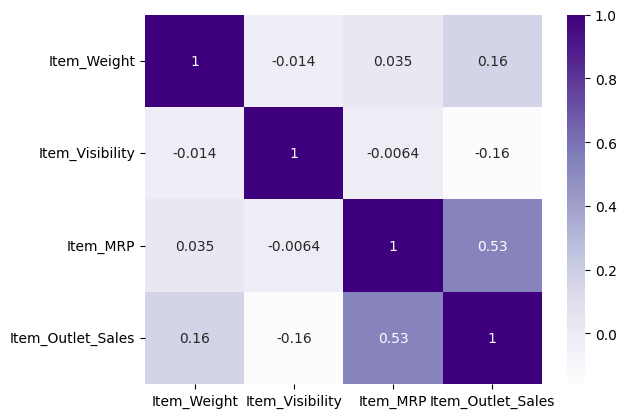

In [30]:
sns.heatmap(data = correlation_original, annot=True, cmap='Purples')

Encoding and Normalizing the data

In [31]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [32]:
df1 = df.drop(['Item_Identifier', 'Outlet_Identifier' , 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], axis=1)

In [33]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales
0,12.300000,Low Fat,0.111448,Food,33.4874,436.608721
1,12.300000,Low Fat,0.111904,Food,33.9874,443.127721
2,12.300000,Low Fat,0.111728,Food,33.9874,564.598400
3,12.300000,Low Fat,0.000000,Food,34.3874,1719.370000
4,9.800000,Regular,0.045523,Food,35.0874,352.874000
...,...,...,...,...,...,...
14199,12.800000,Low Fat,0.069606,Food,261.9252,4984.178800
14200,12.800000,Low Fat,0.070013,Food,262.8252,2885.577200
14201,12.800000,Low Fat,0.069561,Food,263.0252,2885.577200
14202,13.659758,Low Fat,0.069282,Food,263.5252,3803.676434


In [34]:
s = (df1.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['Item_Fat_Content', 'Item_Type']
No. of. categorical features:  2


In [35]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df1[object_cols]))
OH_cols.index = df1.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df1.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)
#df_final = df_final.drop(['Item_Fat_Content', 'Item_Type'], axis=1)
df_final

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Others,Item_Type_Things
0,12.300000,0.111448,33.4874,436.608721,1.0,0.0,1.0,0.0,0.0
1,12.300000,0.111904,33.9874,443.127721,1.0,0.0,1.0,0.0,0.0
2,12.300000,0.111728,33.9874,564.598400,1.0,0.0,1.0,0.0,0.0
3,12.300000,0.000000,34.3874,1719.370000,1.0,0.0,1.0,0.0,0.0
4,9.800000,0.045523,35.0874,352.874000,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
14199,12.800000,0.069606,261.9252,4984.178800,1.0,0.0,1.0,0.0,0.0
14200,12.800000,0.070013,262.8252,2885.577200,1.0,0.0,1.0,0.0,0.0
14201,12.800000,0.069561,263.0252,2885.577200,1.0,0.0,1.0,0.0,0.0
14202,13.659758,0.069282,263.5252,3803.676434,1.0,0.0,1.0,0.0,0.0


In [36]:
encoder = OneHotEncoder(sparse_output=False)
encoded_categories = encoder.fit_transform(df1[['Item_Fat_Content', 'Item_Type']])
category_columns = encoder.get_feature_names_out(['Item_Fat_Content', 'Item_Type'])
df_encoded = pd.DataFrame(encoded_categories, columns=category_columns)

In [37]:
df_encoded

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Others,Item_Type_Things
0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...
14199,1.0,0.0,1.0,0.0,0.0
14200,1.0,0.0,1.0,0.0,0.0
14201,1.0,0.0,1.0,0.0,0.0
14202,1.0,0.0,1.0,0.0,0.0


In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Item_Weight               14204 non-null  float64
 1   Item_Visibility           14204 non-null  float64
 2   Item_MRP                  14204 non-null  float64
 3   Item_Outlet_Sales         14204 non-null  float64
 4   Item_Fat_Content_Low Fat  14204 non-null  float64
 5   Item_Fat_Content_Regular  14204 non-null  float64
 6   Item_Type_Food            14204 non-null  float64
 7   Item_Type_Others          14204 non-null  float64
 8   Item_Type_Things          14204 non-null  float64
dtypes: float64(9)
memory usage: 998.8 KB


In [39]:
correlation_final = df_final.corr()

<Axes: >

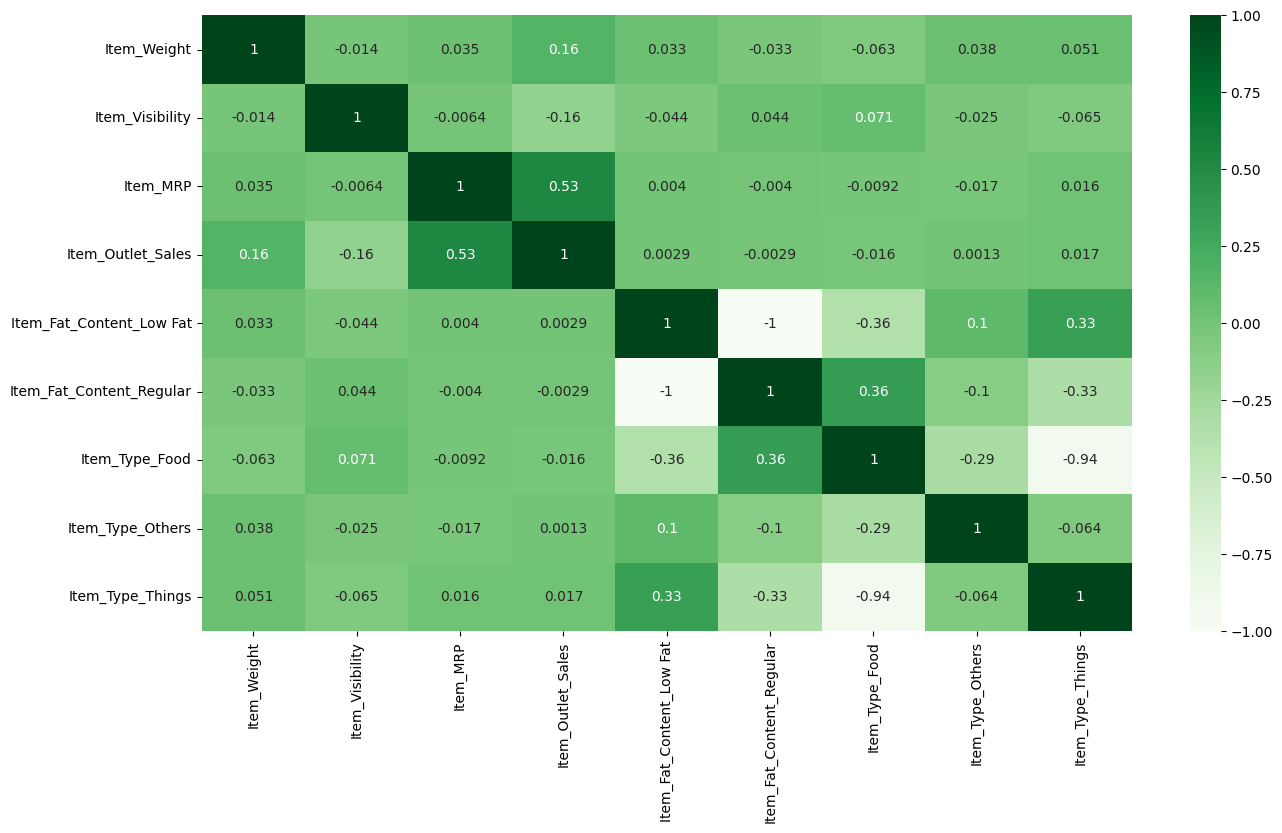

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(data = correlation_final, annot = True, cmap='Greens')

In [41]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_final[[ 'Item_Weight', 'Item_Visibility',	'Item_MRP',	'Item_Outlet_Sales']])
df_normalized = pd.DataFrame(scaled, columns = ['Item_Weight', 'Item_Visibility',	'Item_MRP',	'Item_Outlet_Sales'])

In [42]:
df_normalized

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.304382,0.339375,0.009327,0.012930
1,0.304382,0.340765,0.011449,0.013139
2,0.304382,0.340228,0.011449,0.017034
3,0.304382,0.000000,0.013147,0.054056
4,0.206131,0.138624,0.016118,0.010246
...,...,...,...,...
14199,0.324032,0.211960,0.978934,0.158726
14200,0.324032,0.213199,0.982754,0.091445
14201,0.324032,0.211823,0.983603,0.091445
14202,0.357821,0.210973,0.985725,0.120879


In [43]:
df_combined = pd.concat([ df_normalized, df_encoded], axis=1)

In [44]:
df_combined

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Others,Item_Type_Things
0,0.304382,0.339375,0.009327,0.012930,1.0,0.0,1.0,0.0,0.0
1,0.304382,0.340765,0.011449,0.013139,1.0,0.0,1.0,0.0,0.0
2,0.304382,0.340228,0.011449,0.017034,1.0,0.0,1.0,0.0,0.0
3,0.304382,0.000000,0.013147,0.054056,1.0,0.0,1.0,0.0,0.0
4,0.206131,0.138624,0.016118,0.010246,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
14199,0.324032,0.211960,0.978934,0.158726,1.0,0.0,1.0,0.0,0.0
14200,0.324032,0.213199,0.982754,0.091445,1.0,0.0,1.0,0.0,0.0
14201,0.324032,0.211823,0.983603,0.091445,1.0,0.0,1.0,0.0,0.0
14202,0.357821,0.210973,0.985725,0.120879,1.0,0.0,1.0,0.0,0.0


In [45]:
df_combined.dropna(inplace = True)
df_combined.shape

(14204, 9)

In [46]:
df_combined1 = df_combined.drop(['Item_Outlet_Sales'], axis = 1)
df_combined1

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Others,Item_Type_Things
0,0.304382,0.339375,0.009327,1.0,0.0,1.0,0.0,0.0
1,0.304382,0.340765,0.011449,1.0,0.0,1.0,0.0,0.0
2,0.304382,0.340228,0.011449,1.0,0.0,1.0,0.0,0.0
3,0.304382,0.000000,0.013147,1.0,0.0,1.0,0.0,0.0
4,0.206131,0.138624,0.016118,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
14199,0.324032,0.211960,0.978934,1.0,0.0,1.0,0.0,0.0
14200,0.324032,0.213199,0.982754,1.0,0.0,1.0,0.0,0.0
14201,0.324032,0.211823,0.983603,1.0,0.0,1.0,0.0,0.0
14202,0.357821,0.210973,0.985725,1.0,0.0,1.0,0.0,0.0


In [47]:
df_combined1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Others,Item_Type_Things
Item_Weight,1.000000,-0.014176,0.034502,0.032692,-0.032692,-0.062525,0.037531,0.051365
Item_Visibility,-0.014176,1.000000,-0.006351,-0.044274,0.044274,0.071316,-0.024617,-0.065329
Item_MRP,0.034502,-0.006351,1.000000,0.004019,-0.004019,-0.009151,-0.016582,0.015699
Item_Fat_Content_Low Fat,0.032692,-0.044274,0.004019,1.000000,-1.000000,-0.356971,0.104825,0.333820
Item_Fat_Content_Regular,-0.032692,0.044274,-0.004019,-1.000000,1.000000,0.356971,-0.104825,-0.333820
Item_Type_Food,-0.062525,0.071316,-0.009151,-0.356971,0.356971,1.000000,-0.293652,-0.935145
Item_Type_Others,0.037531,-0.024617,-0.016582,0.104825,-0.104825,-0.293652,1.000000,-0.064038
Item_Type_Things,0.051365,-0.065329,0.015699,0.333820,-0.333820,-0.935145,-0.064038,1.000000


<Axes: >

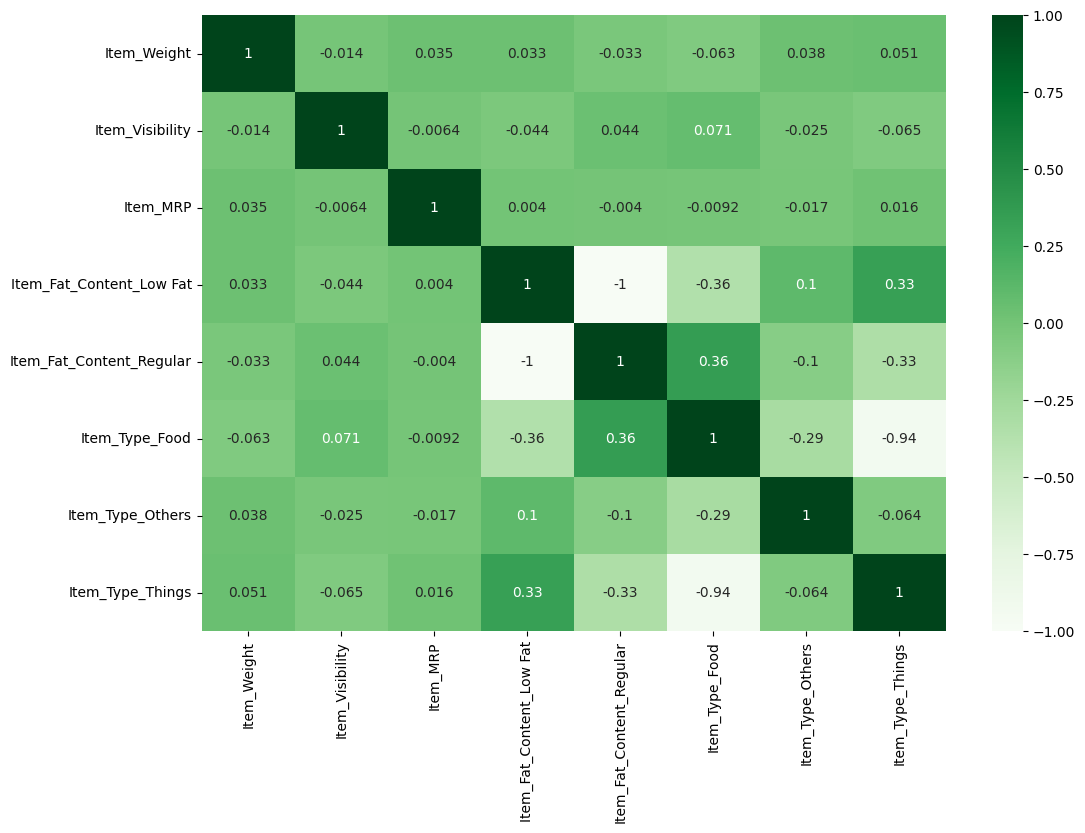

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(data = df_combined1.corr(), annot= True, cmap='Greens')

defining X and Y

In [49]:
X = df_combined1.drop(['Item_MRP'], axis = 1)
X

,Item_Weight,Item_Visibility,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Others,Item_Type_Things
0,0.304382,0.339375,1.0,0.0,1.0,0.0,0.0
1,0.304382,0.340765,1.0,0.0,1.0,0.0,0.0
2,0.304382,0.340228,1.0,0.0,1.0,0.0,0.0
3,0.304382,0.000000,1.0,0.0,1.0,0.0,0.0
4,0.206131,0.138624,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
14199,0.324032,0.211960,1.0,0.0,1.0,0.0,0.0
14200,0.324032,0.213199,1.0,0.0,1.0,0.0,0.0
14201,0.324032,0.211823,1.0,0.0,1.0,0.0,0.0
14202,0.357821,0.210973,1.0,0.0,1.0,0.0,0.0


In [50]:
Y = df_combined1.Item_MRP
Y

,Item_MRP
0,0.009327
1,0.011449
2,0.011449
3,0.013147
4,0.016118
...,...
14199,0.978934
14200,0.982754
14201,0.983603
14202,0.985725


Splitting the data

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [53]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11363, 7), (2841, 7), (11363,), (2841,))

Training model

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
model = RandomForestRegressor()

In [56]:
model.fit(X_train, Y_train)

RandomForestRegressor()

Predicting target variable

In [57]:
Y_Pred = model.predict(X_test)

In [58]:
Y_Pred.shape

(2841,)

In [59]:
Y_Pred

array([0.413508  , 0.44785628, 0.14182326, ..., 0.85158621, 0.34130788,
       0.63514453])

Evaluation of model

In [67]:
model.score(X_train, Y_train)

0.9329798568524852

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [62]:
mean_squared_error(Y_test, Y_Pred)

0.02353382363953391

In [63]:
mean_absolute_error(Y_test, Y_Pred)

0.08198531939417861

In [64]:
r2_score(Y_test, Y_Pred)

0.6618762502167916

Plotting the graph


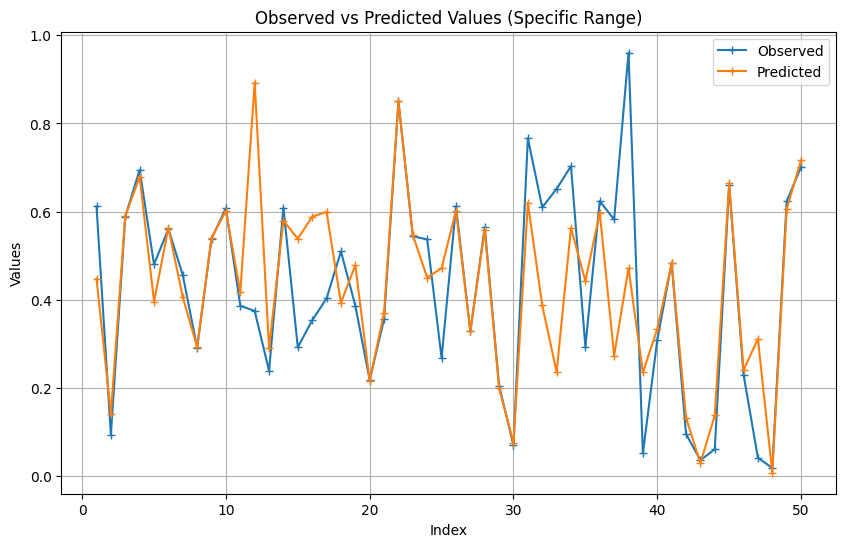

In [65]:
# Define the specific range (e.g., from index 2 to 7)
start_index = 1
end_index = 50

# Slice the data for the specific range
Y_range = Y_test[start_index:end_index + 1]
YP_range = Y_Pred[start_index:end_index + 1]
Yt_range = np.arange(start_index, end_index + 1)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(Yt_range, Y_range, label='Observed', marker='+')
plt.plot(Yt_range, YP_range, label='Predicted', marker='+')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Observed vs Predicted Values (Specific Range)')
plt.legend()
plt.grid(True)
plt.show()

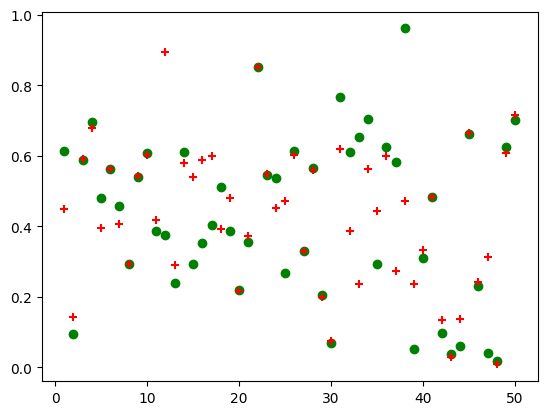

In [66]:
#sns.scatterplot(x= Y_range,y= YP_range, color= 'purple')

plt.scatter(Yt_range, Y_range, color='green', label='y_test', marker='o')

plt.scatter(Yt_range, YP_range, color='red', label='y_prediction', marker='+')